## Installing bs4

In [125]:
!pip install beautifulsoup4

## Importing required libraries

In [126]:
import re
import requests
import openpyxl
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import plotly.graph_objects as go
from bs4 import BeautifulSoup

## Web Scraping (Data Collection)

In [128]:
base_url = "https://www.flipkart.com/mobiles/pr?sid=tyy%2C4io&otracker=nmenu_sub_Electronics_0_Mobiles"   # base url
page_limit = 200   # Number of pages to scrape

phone_urls = []   # Stores the urls of all the phones in 'page_limit' pages

for page in range(1, page_limit+1):
    url = base_url + "&page=" + str(page)   # Generate the endpoint URL for the current page
    response = requests.get(url)            # Send a GET request to the URL
    soup = BeautifulSoup(response.content, 'html.parser')   # Create a BeautifulSoup object for parsing the HTML

    product_list = soup.find_all('div', {'class': '_1AtVbE'})   # Find all product divs in the HTML

    for product in product_list:
        product_link = product.find('a', {'class': '_1fQZEK'})   # Find the anchor tag containing the product link
        if product_link:
            phone_urls.append("https://www.flipkart.com" + product_link['href'])   # Append the complete URL to the phone_urls list

print("Scraping Complete.")
print("Total Smartphone URLs Scraped:", len(phone_urls))

Scraping Complete!
Total Smartphone URLs Scraped: 984


In [129]:
# Create a new Excel workbook
workbook = openpyxl.Workbook()
sheet = workbook.active

# Write headers to the Excel file
headers = ['Model', 'Brand', 'Price', 'Rating', 'Ratings', 'Reviews', 'Rating 5', 'Rating 4', 'Rating 3', 'Rating 2', 'Rating 1', 'Camera', 'Battery', 'Display', 'Design', 'Flipkart Assured', 'URL']
sheet.append(headers)

# Iterate over the phone URLs and populate the data in the Excel file
for url in phone_urls:
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Extract 'Model' name
    product_name_element = soup.find('span', {'class': 'B_NuCI'})
    product_name = product_name_element.text.strip() if product_name_element else 'N/A'

    # Extract the 'Brand' name from it
    brand = product_name.split(' ')[0]

    # Extract product 'Price'
    product_price_element = soup.find('div', {'class': '_30jeq3 _16Jk6d'})
    product_price = product_price_element.text.strip() if product_price_element else 'N/A'

    # Extract product 'Rating'
    product_rating_element = soup.find('div', {'class': '_2d4LTz'})
    product_rating = product_rating_element.text.strip() if product_rating_element else 'N/A'

    # Extract 'Ratings'
    ratings_section = soup.find('div', {'class': '_13sFCC'})
    if ratings_section:
        rating_elements = ratings_section.find_all('span', {'class': '_26f_zl'})
        count_elements = ratings_section.find_all('div', {'class': '_1uJVNT'})

        ratings = {}
        for rating_element, count_element in zip(rating_elements, count_elements):
            rating = rating_element.text.strip()
            count = count_element.text.strip().replace(',', '')  # Remove commas from count
            ratings[rating] = count

        rating_5 = ratings.get('5', 'N/A')
        rating_4 = ratings.get('4', 'N/A')
        rating_3 = ratings.get('3', 'N/A')
        rating_2 = ratings.get('2', 'N/A')
        rating_1 = ratings.get('1', 'N/A')
    else:
        rating_5 = 'N/A'
        rating_4 = 'N/A'
        rating_3 = 'N/A'
        rating_2 = 'N/A'
        rating_1 = 'N/A'

    # Extract Ratings and Reviews count
    ratings_reviews_element = soup.find('span', {'class': '_2_R_DZ'})
    if ratings_reviews_element:
        ratings_element = ratings_reviews_element.find('span', recursive=False)
        if ratings_element:
            ratings_text = ratings_element.text.strip()
            ratings, reviews = ratings_text.split('&')
            ratings = ratings.strip().replace(',', '')
            reviews = reviews.strip().replace(',', '')
        else:
            ratings = 'N/A'
            reviews = 'N/A'
    else:
        ratings = 'N/A'
        reviews = 'N/A'

    # Extract camera, battery, display, and design information
    product_camera_element = soup.find('div', {'class': '_3npa3F'}, text='Camera')
    product_camera = product_camera_element.find_previous('text', {'class': '_2Ix0io'}).text.strip() if product_camera_element else 'N/A'

    product_battery_element = soup.find('div', {'class': '_3npa3F'}, text='Battery')
    product_battery = product_battery_element.find_previous('text', {'class': '_2Ix0io'}).text.strip() if product_battery_element else 'N/A'

    product_display_element = soup.find('div', {'class': '_3npa3F'}, text='Display')
    product_display = product_display_element.find_previous('text', {'class': '_2Ix0io'}).text.strip() if product_display_element else 'N/A'

    product_design_element = soup.find('div', {'class': '_3npa3F'}, text='Design')
    product_design = product_design_element.find_previous('text', {'class': '_2Ix0io'}).text.strip() if product_design_element else 'N/A'

    flipkart_assured_element = soup.find('span', {'class': 'b7864- _2Z07dN'})
    flipkart_assured = 'Yes' if flipkart_assured_element else 'No'

    # Append the data to the Excel file
    row = [
        product_name,
        brand,
        product_price,
        product_rating,
        ratings if ratings != 'N/A' else 'N/A',
        reviews if reviews != 'N/A' else 'N/A',
        rating_5,
        rating_4,
        rating_3,
        rating_2,
        rating_1,
        product_camera,
        product_battery,
        product_display,
        product_design,
        flipkart_assured,
        url
    ]
    sheet.append(row)

# Save the Excel file
workbook.save('smartphone_data.xlsx')


<ipython-input-129-448b4725ae55>:63: DeprecationWarning:

The 'text' argument to find()-type methods is deprecated. Use 'string' instead.

<ipython-input-129-448b4725ae55>:66: DeprecationWarning:

The 'text' argument to find()-type methods is deprecated. Use 'string' instead.

<ipython-input-129-448b4725ae55>:69: DeprecationWarning:

The 'text' argument to find()-type methods is deprecated. Use 'string' instead.

<ipython-input-129-448b4725ae55>:72: DeprecationWarning:

The 'text' argument to find()-type methods is deprecated. Use 'string' instead.



## Data Loading

In [130]:
df = pd.read_excel('/content/smartphone_data.xlsx')
df.head()   # Print first five

,Model,Brand,Price,Rating,Ratings,Reviews,Rating 5,Rating 4,Rating 3,Rating 2,Rating 1,Camera,Battery,Display,Design,Flipkart Assured,URL
0,"realme 11 Pro+ 5G (Astral Black, 256 GB) (8 G...",realme,"₹27,999",4.3,10972 Ratings,1292 Reviews,7004.0,2262.0,619.0,247.0,840.0,4.0,4.2,4.5,4.5,Yes,https://www.flipkart.com/realme-11-pro-5g-astr...
1,"OPPO Reno10 Pro 5G (Silvery Grey, 256 GB) (12...",OPPO,"₹39,999",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,https://www.flipkart.com/oppo-reno10-pro-5g-si...
2,"SAMSUNG Galaxy F13 (Nightsky Green, 64 GB) (4...",SAMSUNG,"₹9,499",4.3,157884 Ratings,9073 Reviews,101300.0,31289.0,11433.0,4401.0,9461.0,3.7,4.2,4.0,4.0,Yes,https://www.flipkart.com/samsung-galaxy-f13-ni...
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB) (4...",SAMSUNG,"₹9,499",4.3,157884 Ratings,9073 Reviews,101300.0,31289.0,11433.0,4401.0,9461.0,3.7,4.2,4.0,4.0,Yes,https://www.flipkart.com/samsung-galaxy-f13-su...
4,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB) (4...",SAMSUNG,"₹9,499",4.3,157884 Ratings,9271 Reviews,101300.0,31289.0,11433.0,4401.0,9461.0,3.7,4.2,4.0,4.0,Yes,https://www.flipkart.com/samsung-galaxy-f13-wa...


## Data Cleaning

In [131]:
# Rename the column names to more appropriate ones
df = df.rename(columns={'Price': 'Price(INR)',
                        'Ratings': 'Ratings_count',
                        'Reviews': 'Reviews_count',
                        'Rating 5': 'Rating_5',
                        'Rating 4': 'Rating_4',
                        'Rating 3': 'Rating_3',
                        'Rating 2': 'Rating_2',
                        'Rating 1': 'Rating_1'})

In [132]:
df['Price(INR)'] = df['Price(INR)'].fillna('0')  # Replace NaN values with '0'
df['Price(INR)'] = df['Price(INR)'].str.replace('₹', '')  # Remove currency '₹' symbol
df['Price(INR)'] = df['Price(INR)'].str.replace(',', '')  # Remove commas
df['Price(INR)'] = df['Price(INR)'].astype(int)  # Convert to integer dtype

In [133]:
# Convert the 'Ratings_count' and 'Reviews_count' columns to strings
df['Ratings_count'] = df['Ratings_count'].astype(str)
df['Reviews_count'] = df['Reviews_count'].astype(str)

# Remove non-integer part from "Ratings_count" column
df['Ratings_count'] = df['Ratings_count'].apply(lambda x: re.findall('\d+', x)[0] if re.findall('\d+', x) else 'N/A')

# Remove non-integer part from "Reviews_count" column
df['Reviews_count'] = df['Reviews_count'].apply(lambda x: re.findall('\d+', x)[0] if re.findall('\d+', x) else 'N/A')

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Model             984 non-null    object 
 1   Brand             984 non-null    object 
 2   Price(INR)        984 non-null    int64  
 3   Rating            896 non-null    float64
 4   Ratings_count     984 non-null    object 
 5   Reviews_count     984 non-null    object 
 6   Rating_5          896 non-null    float64
 7   Rating_4          896 non-null    float64
 8   Rating_3          896 non-null    float64
 9   Rating_2          896 non-null    float64
 10  Rating_1          896 non-null    float64
 11  Camera            863 non-null    float64
 12  Battery           865 non-null    float64
 13  Display           865 non-null    float64
 14  Design            865 non-null    float64
 15  Flipkart Assured  984 non-null    object 
 16  URL               984 non-null    object 
dt

In [135]:
df.head()

,Model,Brand,Price(INR),Rating,Ratings_count,Reviews_count,Rating_5,Rating_4,Rating_3,Rating_2,Rating_1,Camera,Battery,Display,Design,Flipkart Assured,URL
0,"realme 11 Pro+ 5G (Astral Black, 256 GB) (8 G...",realme,27999,4.3,10972,1292,7004.0,2262.0,619.0,247.0,840.0,4.0,4.2,4.5,4.5,Yes,https://www.flipkart.com/realme-11-pro-5g-astr...
1,"OPPO Reno10 Pro 5G (Silvery Grey, 256 GB) (12...",OPPO,39999,NaN,N/A,N/A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,https://www.flipkart.com/oppo-reno10-pro-5g-si...
2,"SAMSUNG Galaxy F13 (Nightsky Green, 64 GB) (4...",SAMSUNG,9499,4.3,157884,9073,101300.0,31289.0,11433.0,4401.0,9461.0,3.7,4.2,4.0,4.0,Yes,https://www.flipkart.com/samsung-galaxy-f13-ni...
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB) (4...",SAMSUNG,9499,4.3,157884,9073,101300.0,31289.0,11433.0,4401.0,9461.0,3.7,4.2,4.0,4.0,Yes,https://www.flipkart.com/samsung-galaxy-f13-su...
4,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB) (4...",SAMSUNG,9499,4.3,157884,9271,101300.0,31289.0,11433.0,4401.0,9461.0,3.7,4.2,4.0,4.0,Yes,https://www.flipkart.com/samsung-galaxy-f13-wa...


## Exploratory data analysis

### Univariate Analysis

In [136]:
df.shape   # Dimension of the data frame

(984, 17)

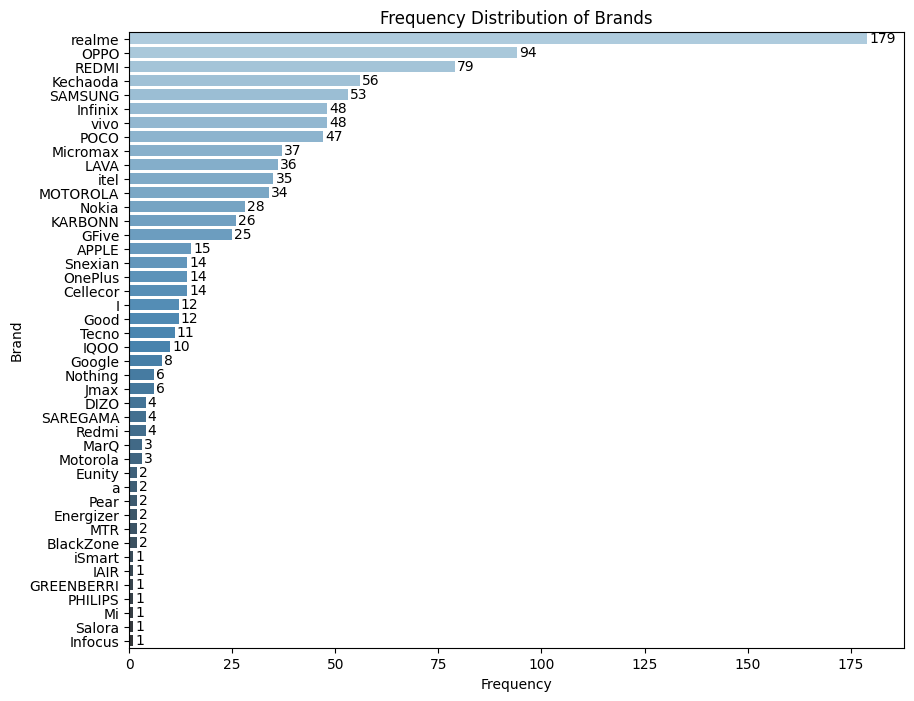

In [137]:
# Frequency distribution of Brands
plt.figure(figsize=(10, 8))
brand_counts = df['Brand'].value_counts().sort_values(ascending=False)
ax = sns.barplot(x=brand_counts, y=brand_counts.index, palette='Blues_d')
plt.xlabel('Frequency')
plt.ylabel('Brand')
plt.title('Frequency Distribution of Brands')

# Annotating the bars with frequency count
for i, count in enumerate(brand_counts):
    ax.text(count + 0.5, i, str(count), va='center')

plt.show()

count      984.000000
mean     15302.089431
std      15657.842277
min        639.000000
25%       1467.500000
50%      10374.000000
75%      23999.000000
max      73999.000000
Name: Price(INR), dtype: float64


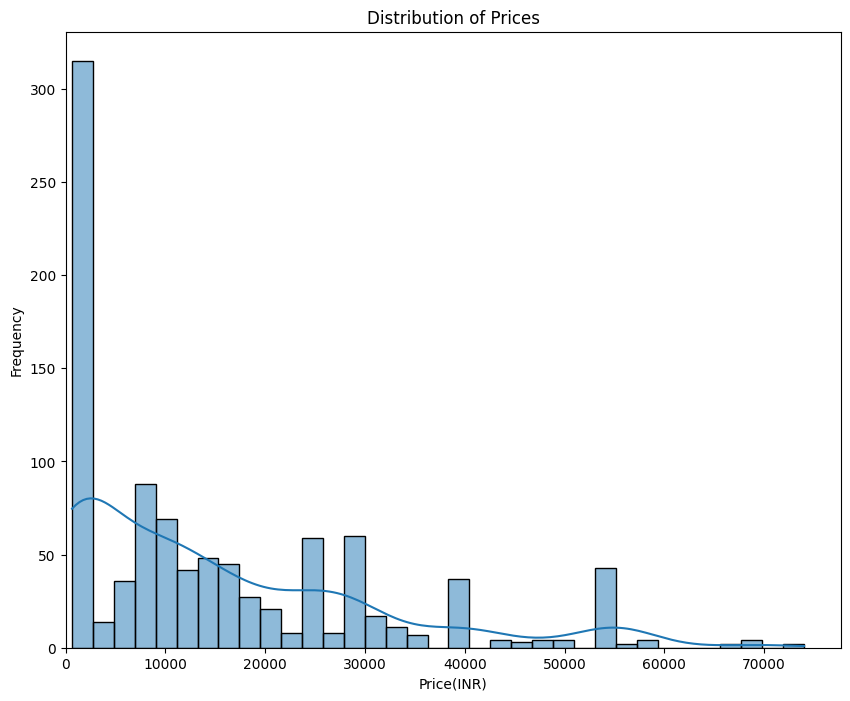

In [138]:
# Price(INR) distribution
price_stats = df['Price(INR)'].describe()
price_mode = df['Price(INR)'].mode().values[0]
print(price_stats)

# Histogram
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x='Price(INR)', bins=35, kde=True)
plt.xlabel('Price(INR)')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.xlim(0)
plt.show()

In [139]:
# Calculate the counts and percentages
flipkart_assured_counts = df['Flipkart Assured'].value_counts()
labels = flipkart_assured_counts.index
values = flipkart_assured_counts.values
percentages = (values / values.sum()) * 100

# Create the pie chart
fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values,
                             textposition='inside',  # Place labels inside the pie slices
                             hole=0.3,
                             marker=dict(colors=['#3E5F76', '#8EBAD9']))])

# Set the title and layout
fig.update_layout(title='Flipkart Assured Distribution')

# Update the label text
fig.update_traces(textinfo='percent+label')

# Show the chart
fig.show()

In [140]:
# Define the color palette
colors = ['#03045e', '#22437d', '#42829d', '#61c0bc', '#80ffdb']

# Create a dropdown widget for model selection
model_dropdown = widgets.Dropdown(options=df['Model'].sort_values().unique(), description='Model:')

# Function to update the pie chart based on model selection
def update_pie_chart(model):
    # Filter the DataFrame based on the selected model
    model_df = df[df['Model'] == model]

    # Calculate the count of each rating for the selected model
    rating_counts = model_df[['Rating_5', 'Rating_4', 'Rating_3', 'Rating_2', 'Rating_1']].sum()

    # Calculate the percentage-wise breakup
    total_ratings = rating_counts.sum()
    percentages = rating_counts / total_ratings * 100

    # Create labels and values for the pie chart
    labels = ['Rating 5', 'Rating 4', 'Rating 3', 'Rating 2', 'Rating 1']
    values = percentages.values

    # Clear the previous output
    clear_output(wait=True)

    # Create a pie chart
    fig, ax = plt.subplots()
    ax.pie(values, labels=labels, colors=colors, autopct='%1.1f%%')
    ax.set_title(f'Rating Breakup for {model}')
    ax.axis('equal')

    # Show the chart
    plt.show()

# Connect the dropdown and the plot function using interactive_output
output = widgets.interactive_output(update_pie_chart, {'model': model_dropdown})

# Create a VBox container for the dropdown and the output
widget_box = widgets.VBox([model_dropdown, output])

# Display the widget box
display(widget_box)


### Bivariate Analysis

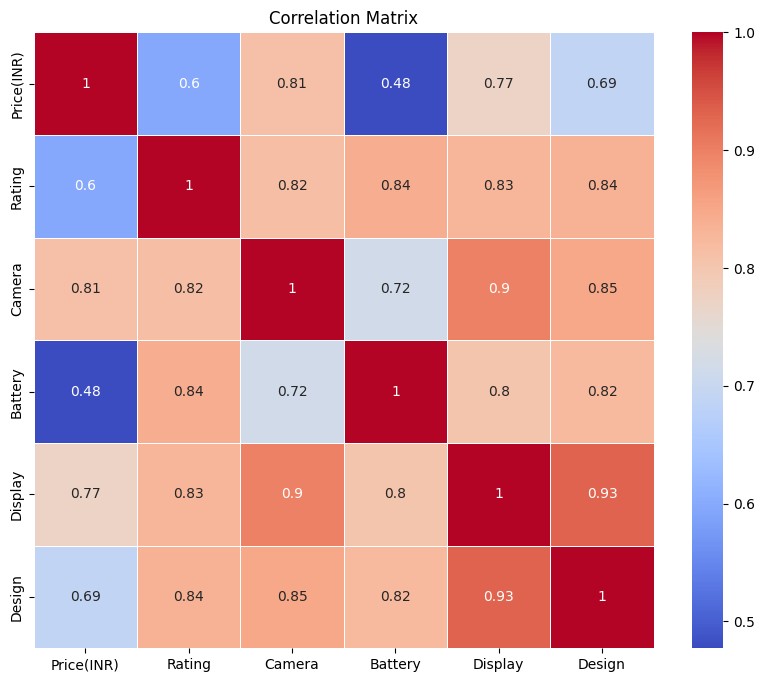

In [142]:
# Select the relevant columns for correlation analysis
columns_of_interest = ['Price(INR)', 'Rating', 'Camera', 'Battery', 'Display', 'Design']

# Create a subset of the dataframe with the selected columns
subset_df = df[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# As we can see that there exists a strong correlation between...
# 1). Design - Display
# 2). Camera - Display
# 3). Rating - Battery

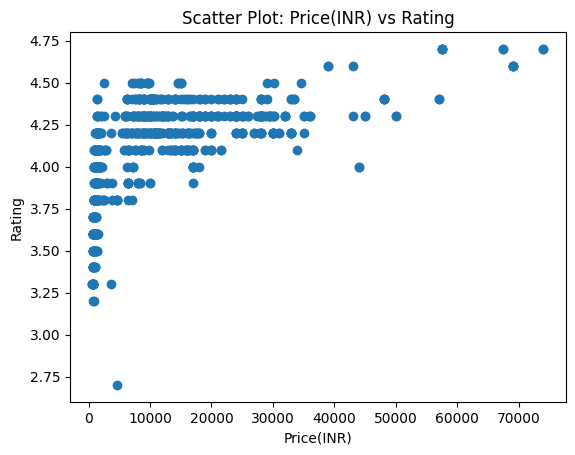

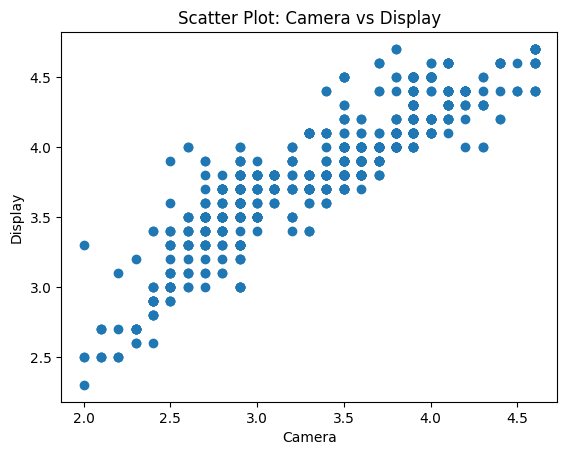

In [145]:
# Scatter plot between Price(INR) and Rating
plt.scatter(df['Price(INR)'], df['Rating'])
plt.xlabel('Price(INR)')
plt.ylabel('Rating')
plt.title('Scatter Plot: Price(INR) vs Rating')
plt.show()

# Scatter plot between Camera and Display
plt.scatter(df['Camera'], df['Display'])
plt.xlabel('Camera')
plt.ylabel('Display')
plt.title('Scatter Plot: Camera vs Display')
plt.show()

## Best Phone Selector

In [58]:
def Best_Phone(df, priority1, priority2):
    # Sort the DataFrame by Rating in descending order
    sorted_df = df.sort_values('Rating', ascending=False)

    # Check if there are multiple phones with the same highest Rating
    max_rating = sorted_df['Rating'].max()
    top_rated_phones = sorted_df[sorted_df['Rating'] == max_rating]

    if len(top_rated_phones) == 1:
        # If only one phone has the highest Rating, return that phone
        return top_rated_phones.iloc[0]
    else:
        if priority1 == 'Price(INR)' or priority2 == 'Price(INR)':
            # Sort the top rated phones by Price(INR) in ascending order
            sorted_phones = top_rated_phones.sort_values('Price(INR)', ascending=True)
        elif priority1 == 'Ratings_count' or priority2 == 'Ratings_count':
            # Calculate the weighted average of the Ratings
            sorted_phones = top_rated_phones.copy()
            sorted_phones['Weighted_Average'] = (sorted_phones['Rating_5'] * 0.5) + (sorted_phones['Rating_4'] * 0.25) + (sorted_phones['Rating_3'] * 0.15) + (sorted_phones['Rating_2'] * 0.07) + (sorted_phones['Rating_1'] * 0.03)
            sorted_phones = sorted_phones.sort_values('Weighted_Average', ascending=False)
        else:
            # Sort the top rated phones by priority1 in descending order
            sorted_phones = top_rated_phones.sort_values(priority1, ascending=False)

        # Check if there are multiple phones with the same highest priority1
        max_priority1 = sorted_phones[priority1].max()
        top_priority1_phones = sorted_phones[sorted_phones[priority1] == max_priority1]

        if len(top_priority1_phones) == 1:
            # If only one phone has the highest priority1, return that phone
            return top_priority1_phones.iloc[0]
        else:
            if priority2 == 'Price(INR)':
                # Sort the top priority1 phones by Price(INR) in ascending order
                sorted_phones = top_priority1_phones.sort_values('Price(INR)', ascending=True)
            elif priority2 == 'Ratings_count':
                # Calculate the weighted average of the Ratings for the top priority1 phones
                sorted_phones = top_priority1_phones.copy()
                sorted_phones['Weighted_Average'] = (sorted_phones['Rating_5'] * 0.5) + (sorted_phones['Rating_4'] * 0.25) + (sorted_phones['Rating_3'] * 0.15) + (sorted_phones['Rating_2'] * 0.07) + (sorted_phones['Rating_1'] * 0.03)
                sorted_phones = sorted_phones.sort_values('Weighted_Average', ascending=False)
            else:
                # Sort the top priority1 phones by priority2 in descending order
                sorted_phones = top_priority1_phones.sort_values(priority2, ascending=False)

            # Return the phone with the highest priority2
            return sorted_phones.iloc[0]


In [61]:
Best_Phone(df,'Display','Ratings_count')

Model                                  APPLE iPhone 13 (Blue, 128 GB)
Brand                                                           APPLE
Price(INR)                                                      57499
Rating                                                            4.6
Ratings_count                                                  232295
Reviews_count                                                   11885
Rating_5                                                     187617.0
Rating_4                                                      28325.0
Rating_3                                                       5699.0
Rating_2                                                       2534.0
Rating_1                                                       8120.0
Camera                                                            4.6
Battery                                                           4.4
Display                                                           4.7
Design              